# Importing libraries and data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('https://techlearn-cdn.s3.amazonaws.com/bs_cricket_predictive_modelling/matches.csv', index_col = 0)
data.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
data.shape

(636, 17)

# Exploratory Data Analysis

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

## Matches played in different seasons


<AxesSubplot:xlabel='season', ylabel='count'>

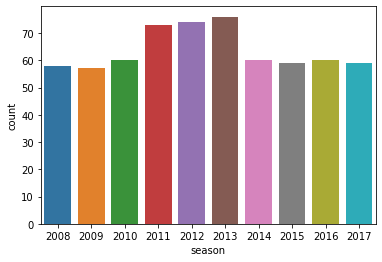

In [5]:
sns.countplot(data=data, x='season')

## Matches winner


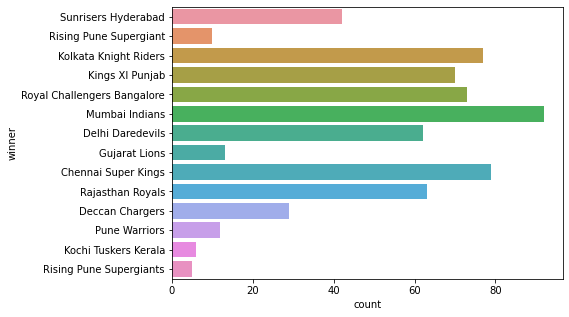

In [6]:
plt.figure(figsize=(7,5))
sns.countplot(data=data, y='winner')
plt.show()

## Toss winner


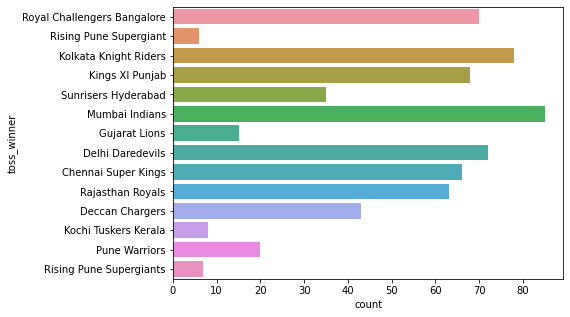

In [7]:
plt.figure(figsize=(7,5))
sns.countplot(data=data, y='toss_winner')
plt.show()

## Finding who win (bat/field) at different stadiums

In [8]:
data["team2"] = data["team2"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
data["team1"] = data["team1"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
data["winner"] = data["winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
data["toss_winner"] = data["toss_winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")

### 1. Finding if the winner is the toss winner also

In [9]:
data['toss_winner_is_winner'] = pd.Series(data['winner'] == data['toss_winner'], dtype='int')
data.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,toss_winner_is_winner
id,,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,0
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,1
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,1
4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,1
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,1


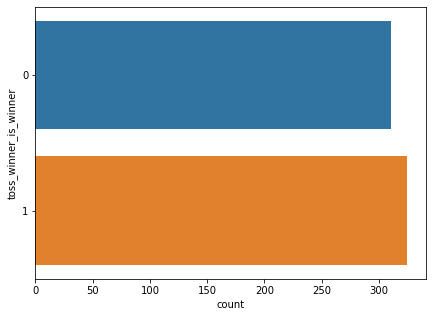

In [10]:
plt.figure(figsize=(7,5))
sns.countplot(data=data, y = 'toss_winner_is_winner')
plt.show()

Weather the winning team chose batting or fielding?

In [11]:
def find_winner_type(x):
    if x['toss_winner_is_winner'] == 1:
        return x['toss_decision']
    else:
        if x['toss_decision'] == 'field':
            return 'bat'
        else:
            return 'field'

In [12]:
data['winner_type'] = data.apply( find_winner_type, axis=1)
data.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,toss_winner_is_winner,winner_type
id,,,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,0,bat
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,1,field
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,1,field
4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,1,field
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,1,bat


# Data cleaning

In [13]:
data.isna().sum()

season                     0
city                       7
date                       0
team1                      0
team2                      0
toss_winner                0
toss_decision              0
result                     0
dl_applied                 0
winner                     3
win_by_runs                0
win_by_wickets             0
player_of_match            3
venue                      0
umpire1                    1
umpire2                    1
umpire3                  636
toss_winner_is_winner      0
winner_type                0
dtype: int64

In [14]:
data.dropna(subset=['winner'], inplace=True)

In [15]:
from sklearn.preprocessing import LabelEncoder

team_encoder = LabelEncoder()
team_encoder.fit(data['team1'].values)

venue_encoder = LabelEncoder()
venue_encoder.fit(data['venue'].values)

LabelEncoder()

In [16]:
data.team1 = team_encoder.transform(data.team1)
data.team2 = team_encoder.transform(data.team2)
data.toss_winner = team_encoder.transform(data.toss_winner)
data.winner = team_encoder.transform(data.winner)
data.venue = venue_encoder.transform(data.venue)

In [17]:
data.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,toss_winner_is_winner,winner_type
id,,,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,12,11,11,field,normal,0,12,35,0,Yuvraj Singh,23,AY Dandekar,NJ Llong,NaN,0,bat
2,2017,Pune,2017-04-06,7,10,10,field,normal,0,10,0,7,SPD Smith,16,A Nand Kishore,S Ravi,NaN,1,field
3,2017,Rajkot,2017-04-07,3,6,6,field,normal,0,6,0,10,CA Lynn,25,Nitin Menon,CK Nandan,NaN,1,field
4,2017,Indore,2017-04-08,10,4,4,field,normal,0,4,0,6,GJ Maxwell,11,AK Chaudhary,C Shamshuddin,NaN,1,field
5,2017,Bangalore,2017-04-08,11,2,11,bat,normal,0,11,15,0,KM Jadhav,14,NaN,NaN,NaN,1,bat


In [18]:
data['month'] = pd.to_datetime(data.date).dt.strftime('%m')
data.head(20)

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,toss_winner_is_winner,winner_type,month
id,,,,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,12,11,11,field,normal,0,12,35,0,Yuvraj Singh,23,AY Dandekar,NJ Llong,NaN,0,bat,04
2,2017,Pune,2017-04-06,7,10,10,field,normal,0,10,0,7,SPD Smith,16,A Nand Kishore,S Ravi,NaN,1,field,04
3,2017,Rajkot,2017-04-07,3,6,6,field,normal,0,6,0,10,CA Lynn,25,Nitin Menon,CK Nandan,NaN,1,field,04
4,2017,Indore,2017-04-08,10,4,4,field,normal,0,4,0,6,GJ Maxwell,11,AK Chaudhary,C Shamshuddin,NaN,1,field,04
5,2017,Bangalore,2017-04-08,11,2,11,bat,normal,0,11,15,0,KM Jadhav,14,NaN,NaN,NaN,1,bat,04
6,2017,Hyderabad,2017-04-09,3,12,12,field,normal,0,12,0,9,Rashid Khan,23,A Deshmukh,NJ Llong,NaN,1,field,04
7,2017,Mumbai,2017-04-09,6,7,7,field,normal,0,7,0,4,N Rana,34,Nitin Menon,CK Nandan,NaN,1,field,04
8,2017,Indore,2017-04-10,11,4,11,bat,normal,0,4,0,8,AR Patel,11,AK Chaudhary,C Shamshuddin,NaN,0,field,04
9,2017,Pune,2017-04-11,2,10,10,field,normal,0,2,97,0,SV Samson,16,AY Dandekar,S Ravi,NaN,0,bat,04


In [19]:
data.insert(5, 'team1_toss_win', pd.Series(data.team1 == data.toss_winner, dtype='int'))
data.drop(columns=['toss_winner'], inplace=True)
data.insert(9, 'team1_win', pd.Series(data.winner==data.team1, dtype='int'))
data.drop(columns=['winner'], inplace=True)

In [20]:
data.toss_decision = data.toss_decision.map({'field':0, 'bat':1})
data.month = data.month.astype('int')

In [21]:
data.head()

,season,city,date,team1,team2,team1_toss_win,toss_decision,result,dl_applied,team1_win,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,toss_winner_is_winner,winner_type,month
id,,,,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,12,11,0,0,normal,0,1,35,0,Yuvraj Singh,23,AY Dandekar,NJ Llong,NaN,0,bat,4
2,2017,Pune,2017-04-06,7,10,0,0,normal,0,0,0,7,SPD Smith,16,A Nand Kishore,S Ravi,NaN,1,field,4
3,2017,Rajkot,2017-04-07,3,6,0,0,normal,0,0,0,10,CA Lynn,25,Nitin Menon,CK Nandan,NaN,1,field,4
4,2017,Indore,2017-04-08,10,4,0,0,normal,0,0,0,6,GJ Maxwell,11,AK Chaudhary,C Shamshuddin,NaN,1,field,4
5,2017,Bangalore,2017-04-08,11,2,1,1,normal,0,1,15,0,KM Jadhav,14,NaN,NaN,NaN,1,bat,4


In [22]:
data['winner_type'].unique()

array(['bat', 'field'], dtype=object)

In [23]:
data['winner_type'] = data['winner_type'].map({'bat' : 0, 'field' : 1})

In [24]:
data.head()

,season,city,date,team1,team2,team1_toss_win,toss_decision,result,dl_applied,team1_win,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,toss_winner_is_winner,winner_type,month
id,,,,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,12,11,0,0,normal,0,1,35,0,Yuvraj Singh,23,AY Dandekar,NJ Llong,NaN,0,0,4
2,2017,Pune,2017-04-06,7,10,0,0,normal,0,0,0,7,SPD Smith,16,A Nand Kishore,S Ravi,NaN,1,1,4
3,2017,Rajkot,2017-04-07,3,6,0,0,normal,0,0,0,10,CA Lynn,25,Nitin Menon,CK Nandan,NaN,1,1,4
4,2017,Indore,2017-04-08,10,4,0,0,normal,0,0,0,6,GJ Maxwell,11,AK Chaudhary,C Shamshuddin,NaN,1,1,4
5,2017,Bangalore,2017-04-08,11,2,1,1,normal,0,1,15,0,KM Jadhav,14,NaN,NaN,NaN,1,0,4


# Training and testing model

In [25]:
X = data[['season', 'venue', 'month', 'team1', 'team2', 'team1_toss_win', 'toss_winner_is_winner', 'winner_type']]
y = data['team1_win']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.80, random_state = 13)

In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 40)
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=40)

In [28]:
model.score(X_train, y_train)

0.9407114624505929

In [29]:
model.score(X_test, y_test)

0.9291338582677166